# __Final Project:__ Profiling Portfolio based on KMN Clustering 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import vstack,array
from math import sqrt
import seaborn as sns

from sklearn.cluster import KMeans
from scipy.cluster.vq import kmeans,vq
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform

# Import from mlfinlab
from mlfinlab.portfolio_optimization.cla import CriticalLineAlgorithm
from mlfinlab.portfolio_optimization.herc import HierarchicalEqualRiskContribution
from mlfinlab.portfolio_optimization.hrp import HierarchicalRiskParity
from mlfinlab.portfolio_optimization.mean_variance import MeanVarianceOptimisation
from mlfinlab.portfolio_optimization import ReturnsEstimators

%matplotlib inline

### __Tunjukkan 3 Clustering Perusahaan Terbuka yang sudah dipilih menggunakan KMeans Clustering__

In [2]:
df_data = pd.read_csv('FinPro_dataset_1_Final.csv')
df_data.drop(['Unnamed: 0'], axis=1)

,Company_Name,Code_Name,Subsector,Equity,PBVR,DER,Div_Yield,ROE,DPR
0,PP London Sumatra Indonesia Tb,LSIP,Plantation,8580.00,0.67,0.2202,0.0225,0.0377,0.3958
1,BISI International Tbk.,BISI,Crops,2340.00,1.04,0.2310,0.1227,0.0416,3.1250
2,Indocement Tunggal Prakarsa Tb,INTP,Basic Industry And Chemicals,23480.00,1.82,0.1660,0.0474,0.0682,1.2644
3,Panca Budi Idaman Tbk.,PBID,Plastics & Packaging,1730.00,0.92,0.3805,0.0694,0.1426,0.4504
4,Waskita Beton Precast Tbk.,WSBP,Cement,7210.00,0.74,1.1848,0.0407,0.0579,0.5138
5,Wilmar Cahaya Indonesia Tbk.,CEKA,Food And Beverages,1200.00,0.97,0.1952,0.0510,0.2216,0.2242
6,Darya-Varia Laboratoria Tbk.,DVLA,Pharmaceuticals,1350.00,1.87,0.4374,0.0476,0.1679,0.5297
7,Budi Starch & Sweetener Tbk.,BUDI,Food And Beverages,1200.00,0.32,1.2986,0.0595,0.0223,0.8333
8,Gudang Garam Tbk.,GGRM,Tobacco Manufacturers,53380.00,1.69,0.4394,0.0555,0.1833,0.5112
9,Mandala Multifinance Tbk.,MFIN,Financial Institution,2370.00,1.14,1.0770,0.0490,0.1809,0.3086


In [3]:
KMeans_cluster = pd.read_csv('KMeans_portfolio_clustering.csv')
KMeans_cluster = KMeans_cluster.drop(['Unnamed: 0'], axis=1)
KMeans_cluster.sort_values(by='Cluster',ascending=True)

,Stock Symbol,Cluster
16,PGLI,0
1,CEKA,0
2,DMAS,0
21,TPMA,0
12,MFMI,0
22,VINS,0
14,NRCA,1
9,LSIP,1
11,MFIN,1
7,INDS,1


<hr>

## __Profiling Cluster 1__

In [4]:
cluster1 = df_data.iloc[[5, 10, 27, 41, 47, 48]]
cluster1 = cluster1.drop(['Unnamed: 0'], axis=1)
cluster1.sort_values(by='Div_Yield', ascending=False)

,Company_Name,Code_Name,Subsector,Equity,PBVR,DER,Div_Yield,ROE,DPR
47,Multifiling Mitra Indonesia Tb,MFMI,Others - Trade Services & Inve,245.12,1.59,0.9744,0.5126,0.1333,6.1395
41,Puradelta Lestari Tbk.,DMAS,Property And Real Estate,6440.00,1.34,0.1894,0.2333,0.0331,10.5000
27,Trans Power Marine Tbk.,TPMA,Transportation,11236.40,0.65,0.3829,0.0821,0.0596,0.8867
10,Victoria Insurance Tbk.,VINS,Insurance,177.03,1.01,0.4403,0.0772,0.0302,2.3750
5,Wilmar Cahaya Indonesia Tbk.,CEKA,Food And Beverages,1200.00,0.97,0.1952,0.0510,0.2216,0.2242
48,Pembangunan Graha Lestari Inda,PGLI,"Tourism, Restaurant And Hotel",64.94,1.62,0.4399,0.0463,0.0274,2.5000


In [5]:
#import historical stock prices data from 2015 - 2020

CEKA = pd.read_csv('CEKA.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
PGLI = pd.read_csv('PGLI.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
DMAS = pd.read_csv('DMAS.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
TPMA = pd.read_csv('TPMA.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
MFMI = pd.read_csv('MFMI.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
VINS = pd.read_csv('VINS.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)

l = [CEKA, PGLI, DMAS, TPMA, MFMI, VINS]
stock_prices_cluster1 = pd.concat(l,keys= ['CEKA', 'PGLI', 'DMAS', 'TPMA', 'MFMI', 'VINS', 'POWR', 'PPRE', 'WSBP'],axis=0).reset_index()
stock_prices_cluster1 = stock_prices_cluster1.drop(['Open', 'High', 'Low', 'Close','Volume'], axis=1)
stock_prices_cluster1['Date'] = pd.to_datetime(stock_prices_cluster1['Date'])
stock_prices_cluster1 = stock_prices_cluster1.set_index('Date', drop=True)
stock_prices_cluster1 = stock_prices_cluster1.sort_index()
stock_prices_cluster1 = stock_prices_cluster1.pivot_table('Adj Close', ['Date'], 'level_0')
stock_prices_cluster1 = stock_prices_cluster1.dropna(axis=0)

stock_prices_cluster1.head(10)

level_0,CEKA,DMAS,MFMI,PGLI,TPMA,VINS
Date,,,,,,
2015-09-28,490.922882,102.393066,200.256958,63.448250,206.600967,89.280197
2015-09-29,532.526428,100.281860,200.256958,63.448250,206.600967,80.777313
2015-09-30,520.045410,100.281860,181.612350,63.448250,219.406799,73.975014
2015-10-01,557.488708,103.448631,181.612350,63.448250,219.406799,72.274445
2015-10-02,557.488708,103.976463,181.612350,63.448250,211.723297,66.322433
2015-10-05,549.167908,107.143242,181.612350,63.448250,191.233948,61.220711
2015-10-06,495.083221,108.726639,181.612350,63.448250,179.281815,62.921280
2015-10-07,532.526428,114.532425,176.087997,67.180504,179.281815,67.172722
2015-10-08,524.205811,116.643631,176.087997,67.180504,171.598312,66.322433


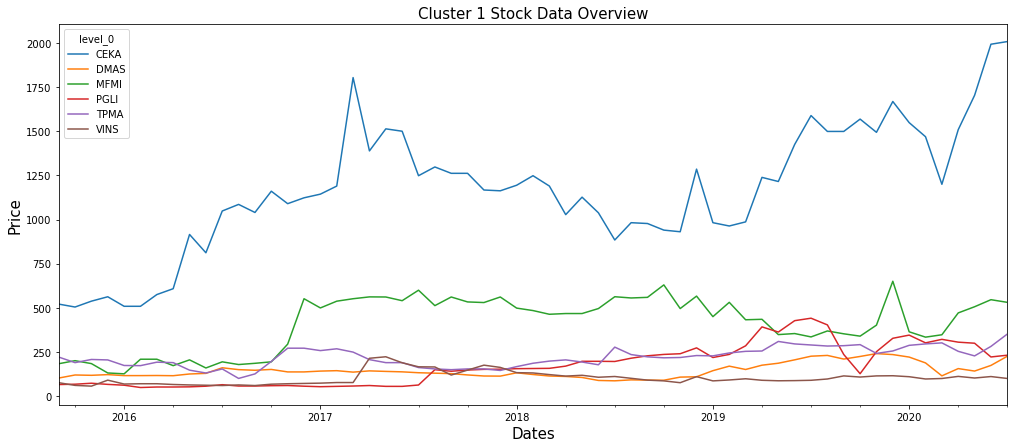

In [6]:
# Taking a quick look at the data
stock_prices_cluster1.resample('M').last().plot(figsize=(17,7))
plt.ylabel('Price', size=15)
plt.xlabel('Dates', size=15)
plt.title('Cluster 1 Stock Data Overview', size=15)
plt.show()

In [7]:
stock_prices_downsampled_cluster1 = stock_prices_cluster1.resample('W').last()
stock_prices_downsampled_cluster1.head()

level_0,CEKA,DMAS,MFMI,PGLI,TPMA,VINS
Date,,,,,,
2015-10-04,557.488708,103.976463,181.612350,63.448250,211.723297,66.322433
2015-10-11,549.167908,121.393837,186.446136,67.180504,197.210007,63.771564
2015-10-18,553.328308,115.060242,179.540710,67.180504,204.893509,65.472145
2015-10-25,528.366089,119.810440,220.973190,67.180504,186.965332,68.873299
2015-11-01,503.403931,117.699242,198.875885,65.314377,187.819061,58.669842


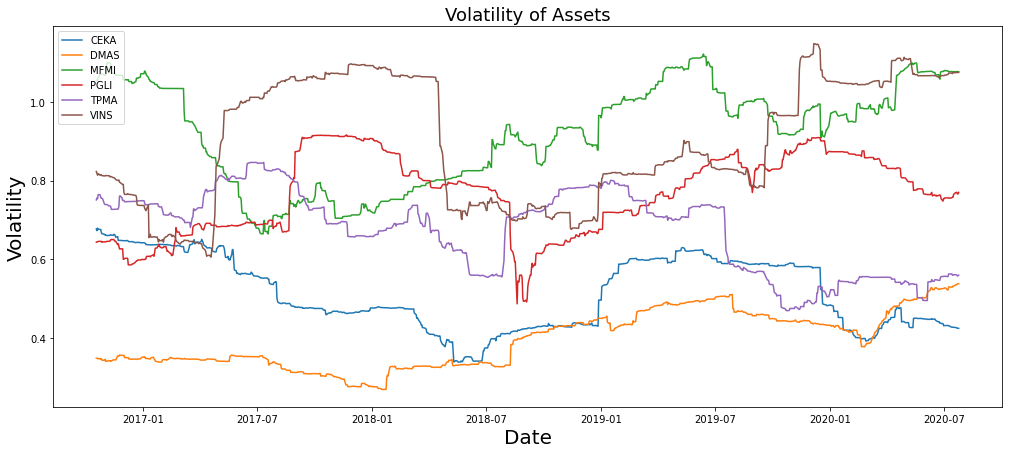

In [8]:
# plotting the volatility of our stocks
volatility = stock_prices_cluster1.pct_change().rolling(window=252).std()*(252**0.5)

plt.figure(figsize=(17,7))
plt.plot(volatility)
plt.ylabel('Volatility', size=20)
plt.xlabel('Date', size=20)
plt.title('Volatility of Assets', size=18)
plt.legend(stock_prices_cluster1.columns, loc='upper left')
plt.show()

In [9]:
#Calculating the percentage change with the previous day price for each asset. This gives us the return for the asset for different time periods

stock_returns_cluster1 = stock_prices_downsampled_cluster1.pct_change().dropna(how='all')
stock_returns_cluster1.head()

level_0,CEKA,DMAS,MFMI,PGLI,TPMA,VINS
Date,,,,,,
2015-10-11,-0.014926,0.167513,0.026616,0.058824,-0.068548,-0.038462
2015-10-18,0.007576,-0.052174,-0.037037,0.000000,0.038961,0.026667
2015-10-25,-0.045113,0.041284,0.230769,0.000000,-0.087500,0.051948
2015-11-01,-0.047244,-0.017621,-0.100000,-0.027778,0.004566,-0.148148
2015-11-08,0.090909,0.045835,-0.027778,-0.142857,0.000000,-0.057971


## Computing the Covariance of the Return, V.

<Figure size 504x504 with 0 Axes>

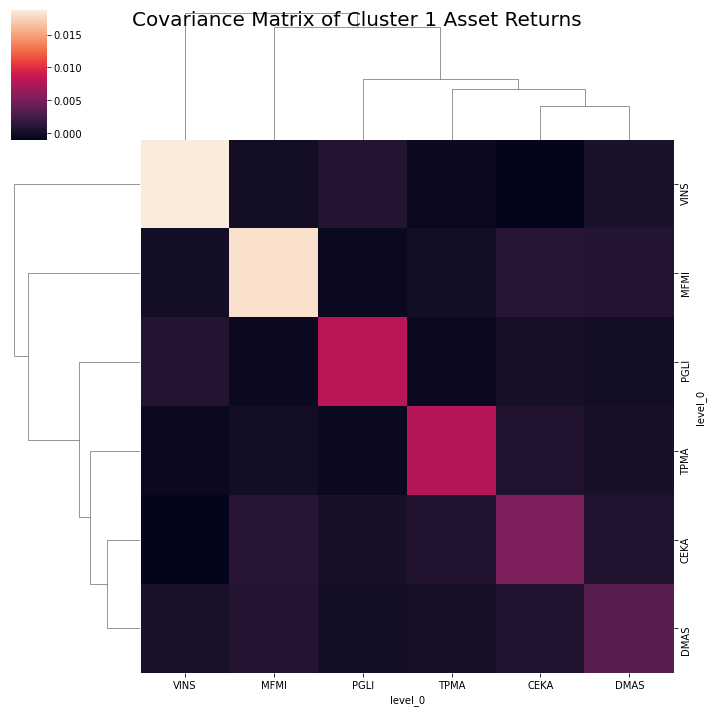

In [10]:
V = stock_returns_cluster1.cov()
plt.figure(figsize=(7, 7))
g = sns.clustermap(V)
g.fig.suptitle('Covariance Matrix of Cluster 1 Asset Returns', fontsize = 20)
plt.show()

## Identifying the hierarchical clusters among the N strategies

In [11]:
correlation_cluster1 = stock_returns_cluster1.corr()
distances_cluster1 = np.sqrt((1 - correlation_cluster1) / 2)
clusters1 = linkage(squareform(distances_cluster1), method="single")
clusters1

array([[0.        , 1.        , 0.64605293, 2.        ],
       [2.        , 6.        , 0.66353256, 3.        ],
       [4.        , 7.        , 0.66502836, 4.        ],
       [3.        , 5.        , 0.68140657, 2.        ],
       [8.        , 9.        , 0.68642035, 6.        ]])

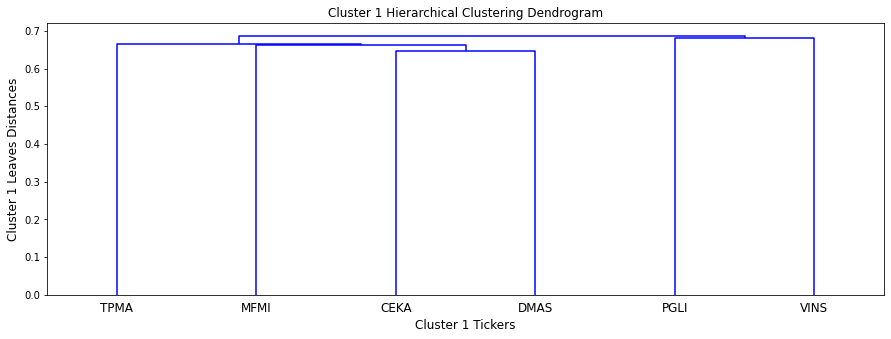

In [12]:
columns = stock_returns_cluster1.columns
plt.figure(figsize=(15, 5))
dendrogram(clusters1, labels=columns)
plt.xlabel('Cluster 1 Tickers', fontsize=12)
plt.ylabel('Cluster 1 Leaves Distances', fontsize=12)
plt.title('Cluster 1 Hierarchical Clustering Dendrogram', fontsize=12)
plt.show()

## Computing the HRP allocations

In [13]:
hrp_cluster1 = HierarchicalRiskParity()
hrp_cluster1.allocate(asset_prices=stock_prices_cluster1)
hrp_weights_cluster1 = hrp_cluster1.weights.sort_values(by=0, ascending=False, axis=1)
hrp_weights_cluster1.T

,0
level_0,
DMAS,0.351559
CEKA,0.221212
TPMA,0.155226
PGLI,0.118975
VINS,0.079803
MFMI,0.073225


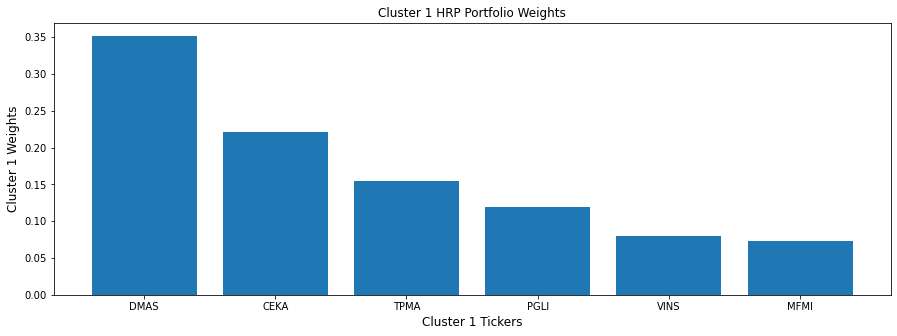

In [14]:
plt.figure(figsize=(15, 5))
plt.bar(hrp_weights_cluster1.columns, hrp_weights_cluster1.values[0])
plt.xlabel('Cluster 1 Tickers', fontsize=12)
plt.ylabel('Cluster 1 Weights', fontsize=12)
plt.title('Cluster 1 HRP Portfolio Weights', fontsize=12)
plt.show()

## Computing HRC Allocations

In [77]:
herc_cluster1 = HierarchicalEqualRiskContribution()
herc_cluster1.allocate(asset_prices=stock_prices_cluster1, risk_measure='conditional_drawdown_risk')
herc_weights_cluster1 = herc_cluster1.weights.sort_values(by=0, ascending=False, axis=1)
herc_weights_cluster1.T

,0
level_0,
TPMA,0.615813
DMAS,0.110631
CEKA,0.075370
PGLI,0.073802
VINS,0.073490
MFMI,0.050894


## Computing the minimum variance (min volatility) solution using Critical Line Algorithm

In [15]:
cla_cluster1 = CriticalLineAlgorithm()
cla_cluster1.allocate(asset_prices=stock_prices_cluster1, resample_by='W', solution='min_volatility')
cla_weights_cluster1 = cla_cluster1.weights.sort_values(by=0, ascending=False, axis=1)
cla_weights_cluster1.T

,0
level_0,
DMAS,0.328497
CEKA,0.196753
PGLI,0.175863
TPMA,0.169082
VINS,0.074797
MFMI,0.055007


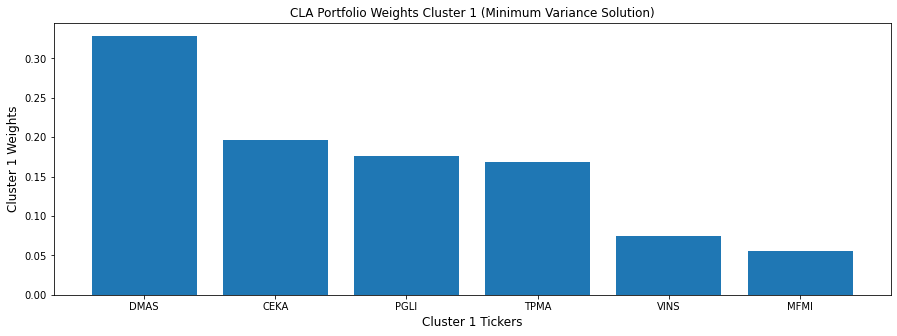

In [16]:
plt.figure(figsize=(15, 5))
plt.bar(cla_weights_cluster1.columns, cla_weights_cluster1.values[0])
plt.xlabel('Cluster 1 Tickers', fontsize=12)
plt.ylabel('Cluster 1 Weights', fontsize=12)
plt.title('CLA Portfolio Weights Cluster 1 (Minimum Variance Solution)', fontsize=12)
plt.show()

## Computing Inverse Variance Portfolio Allocations

In [17]:
mvo = MeanVarianceOptimisation()
mvo.allocate(asset_prices=stock_prices_cluster1, solution='inverse_variance')
ivp_weights_cluster1 = mvo.weights.sort_values(by=0, ascending=False, axis=1)
ivp_weights_cluster1.T

,0
level_0,
DMAS,0.364336
CEKA,0.229252
TPMA,0.143625
PGLI,0.115222
VINS,0.077287
MFMI,0.070278


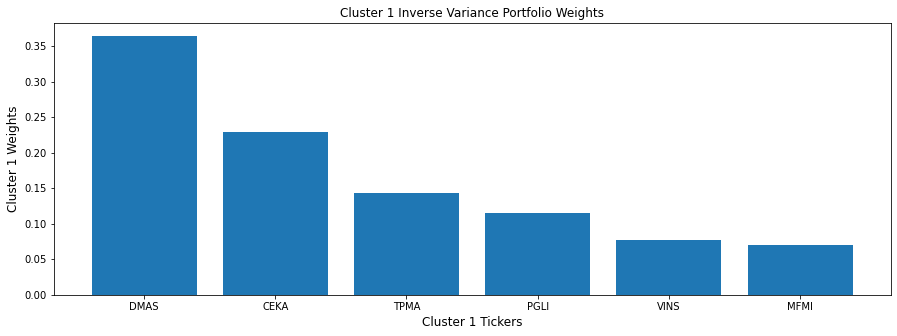

In [18]:
plt.figure(figsize=(15, 5))
plt.bar(ivp_weights_cluster1.columns, ivp_weights_cluster1.values[0])
plt.xlabel('Cluster 1 Tickers', fontsize=12)
plt.ylabel('Cluster 1 Weights', fontsize=12)
plt.title('Cluster 1 Inverse Variance Portfolio Weights', fontsize=12)
plt.show()

## Computing Asset Returns

In [19]:
ret_est_cluster1 = ReturnsEstimators()
stocks_returns_cluster1 = ret_est_cluster1.calculate_returns(stock_prices_cluster1)
stocks_returns_cluster1.iloc[:,0:10].head()

level_0,CEKA,DMAS,MFMI,PGLI,TPMA,VINS
Date,,,,,,
2015-09-29,0.084746,-0.020619,0.000000,0.0,0.000000,-0.095238
2015-09-30,-0.023437,0.000000,-0.093103,0.0,0.061983,-0.084211
2015-10-01,0.072000,0.031579,0.000000,0.0,0.000000,-0.022988
2015-10-02,0.000000,0.005102,0.000000,0.0,-0.035019,-0.082353
2015-10-05,-0.014926,0.030457,0.000000,0.0,-0.096774,-0.076923


## Calculate Cluster 1 Sharpe Ratio

In [20]:
from mlfinlab.backtest_statistics import sharpe_ratio
sr_cluster_1 = sharpe_ratio(stocks_returns_cluster1)
sr_cluster_1

level_0
CEKA    0.809709
DMAS    0.592647
MFMI    0.673478
PGLI    0.724892
TPMA    0.491975
VINS    0.455673
dtype: float64

## Cluster 1 Expected Annualized Returns

In [21]:
assets_annual_returns_cluster1 = ret_est_cluster1.calculate_mean_historical_returns(stock_prices_cluster1, frequency=252)
assets_annual_returns_cluster1.sort_values(ascending=False)

level_0
MFMI    0.647140
PGLI    0.543987
CEKA    0.430780
VINS    0.417527
TPMA    0.330683
DMAS    0.250108
dtype: float64

In [22]:
print('Cluster 1 portfolio selection give expected annual return: ', assets_annual_returns_cluster1.mean()*100, 'percent')

Cluster 1 portfolio selection give expected annual return:  43.67042182712437 percent


## Cluster 1 Expected Exponential Annualized Return 

In [23]:
assets_exp_annual_returns_cluster1 = ret_est_cluster1.calculate_exponential_historical_returns(stock_prices_cluster1, frequency=252, span=200)
assets_exp_annual_returns_cluster1.sort_values(ascending=False)

level_0
MFMI    1.012351
DMAS    0.789331
TPMA    0.781873
CEKA    0.709403
VINS    0.255539
PGLI   -0.203742
Name: 2020-07-24 00:00:00, dtype: float64

In [24]:
print('Cluster 1 portfolio give expected annual return exponentially: ', assets_exp_annual_returns_cluster1.mean()*100, 'percent')

Cluster 1 portfolio give expected annual return exponentially:  55.745908707753834 percent


<hr>

## __Profiling Cluster 2__

In [25]:
cluster2 = df_data.iloc[[0, 3, 6, 9, 33, 35, 36, 42, 50]]
cluster2 = cluster2.drop(['Unnamed: 0'], axis=1)
cluster2

,Company_Name,Code_Name,Subsector,Equity,PBVR,DER,Div_Yield,ROE,DPR
0,PP London Sumatra Indonesia Tb,LSIP,Plantation,8580.0,0.67,0.2202,0.0225,0.0377,0.3958
3,Panca Budi Idaman Tbk.,PBID,Plastics & Packaging,1730.0,0.92,0.3805,0.0694,0.1426,0.4504
6,Darya-Varia Laboratoria Tbk.,DVLA,Pharmaceuticals,1350.0,1.87,0.4374,0.0476,0.1679,0.5297
9,Mandala Multifinance Tbk.,MFIN,Financial Institution,2370.0,1.14,1.0770,0.0490,0.1809,0.3086
33,Petrosea Tbk.,PTRO,Non Building Construction,2939.3,0.43,1.6297,0.0732,0.0801,0.2487
35,Indospring Tbk.,INDS,Automotive And Components,2600.0,0.55,0.1068,0.0461,0.0662,0.3802
36,Supreme Cable Manufacturing &,SCCO,Cable,3270.0,0.59,0.2709,0.0535,0.1353,0.2325
42,Nusa Raya Cipta Tbk.,NRCA,Building Construction,1250.0,0.75,0.9575,0.0802,0.0898,0.6667
50,Enseval Putera Megatrading Tbk,EPMT,Wholesale (Durable & Non-Durab,6260.0,0.80,0.5354,0.0486,0.1124,0.3462


In [26]:
#import historical stock prices data 2018 - 2020

NRCA = pd.read_csv('NRCA.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
LSIP = pd.read_csv('LSIP.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
MFIN = pd.read_csv('MFIN.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
INDS = pd.read_csv('INDS.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
SCCO = pd.read_csv('SCCO.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
EPMT = pd.read_csv('EPMT.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
DVLA = pd.read_csv('DVLA.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
PBID = pd.read_csv('PBID.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
PTRO = pd.read_csv('PTRO.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)

m = [NRCA, LSIP, MFIN, INDS, SCCO, EPMT, DVLA, PBID, PTRO]

stock_prices_cluster2 = pd.concat(m,keys= ['NRCA', 'LSIP', 'MFIN', 'INDS', 'SCCO', 'EPMT', 'DVLA', 'PBID', 'PTRO'],axis=0).reset_index()
stock_prices_cluster2 = stock_prices_cluster2.drop(['Open', 'High', 'Low', 'Close','Volume'], axis=1)
stock_prices_cluster2['Date'] = pd.to_datetime(stock_prices_cluster2['Date'])
stock_prices_cluster2 = stock_prices_cluster2.set_index('Date', drop=True)
stock_prices_cluster2 = stock_prices_cluster2.sort_index()
stock_prices_cluster2 = stock_prices_cluster2.pivot_table('Adj Close', ['Date'], 'level_0')
stock_prices_cluster2 = stock_prices_cluster2.dropna(axis=0)

stock_prices_cluster2.head(10)

level_0,DVLA,EPMT,INDS,LSIP,MFIN,NRCA,PBID,PTRO,SCCO
Date,,,,,,,,,
2017-12-13,1702.801636,2751.608887,1089.568481,1167.731934,620.314941,276.711945,702.510315,1522.325684,7818.976074
2017-12-14,1720.266357,2751.608887,1093.944336,1181.914917,626.844604,278.176025,682.552551,1476.067139,7818.976074
2017-12-15,1711.533936,2742.436768,1107.071655,1200.825562,624.668030,278.176025,678.561096,1509.709717,7775.048828
2017-12-18,1685.337158,2742.436768,1120.198975,1229.191528,626.844604,276.711945,674.569519,1480.272461,7818.976074
2017-12-19,1711.533936,2742.436768,1102.695801,1229.191528,626.844604,275.247894,682.552551,1480.272461,7775.048828
2017-12-20,1728.998535,2742.436768,1080.817017,1196.097900,611.608765,267.927399,686.544128,1429.808594,7753.085449
2017-12-21,1694.069336,2742.436768,1098.320190,1181.914917,626.844604,270.855591,690.535645,1421.397949,7753.085449
2017-12-22,1707.167725,2742.436768,1093.944336,1177.187134,626.844604,275.247894,690.535645,1366.728760,7753.085449
2017-12-25,1707.167725,2742.436768,1093.944336,1177.187134,626.844604,275.247894,690.535645,1366.728760,7753.085449


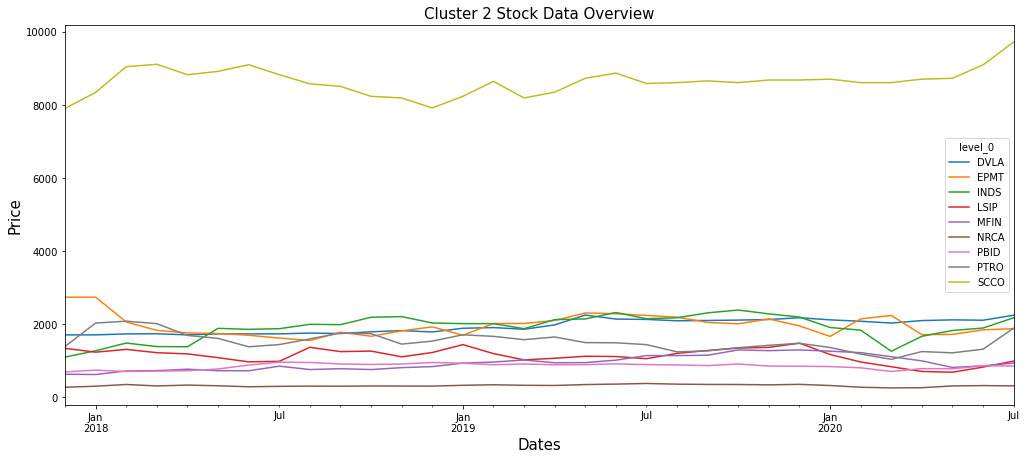

In [27]:
# Taking a quick look at the data
stock_prices_cluster2.resample('M').last().plot(figsize=(17,7))
plt.ylabel('Price', size=15)
plt.xlabel('Dates', size=15)
plt.title('Cluster 2 Stock Data Overview', size=15)
plt.show()

In [28]:
stock_prices_downsampled_cluster2 = stock_prices_cluster2.resample('W').last()
stock_prices_downsampled_cluster2.head()

level_0,DVLA,EPMT,INDS,LSIP,MFIN,NRCA,PBID,PTRO,SCCO
Date,,,,,,,,,
2017-12-17,1711.533936,2742.436768,1107.071655,1200.825562,624.668030,278.176025,678.561096,1509.709717,7775.048828
2017-12-24,1707.167725,2742.436768,1093.944336,1177.187134,626.844604,275.247894,690.535645,1366.728760,7753.085449
2017-12-31,1711.533936,2742.436768,1102.695801,1342.655273,635.550781,278.176025,698.518738,1396.166016,7906.829590
2018-01-07,1728.998535,2742.436768,1220.841797,1281.195679,615.961853,284.032379,758.391724,1602.226685,8082.536621
2018-01-14,1711.533936,2742.436768,1225.217651,1314.289429,622.491516,304.529510,726.459412,1799.876709,8170.390137


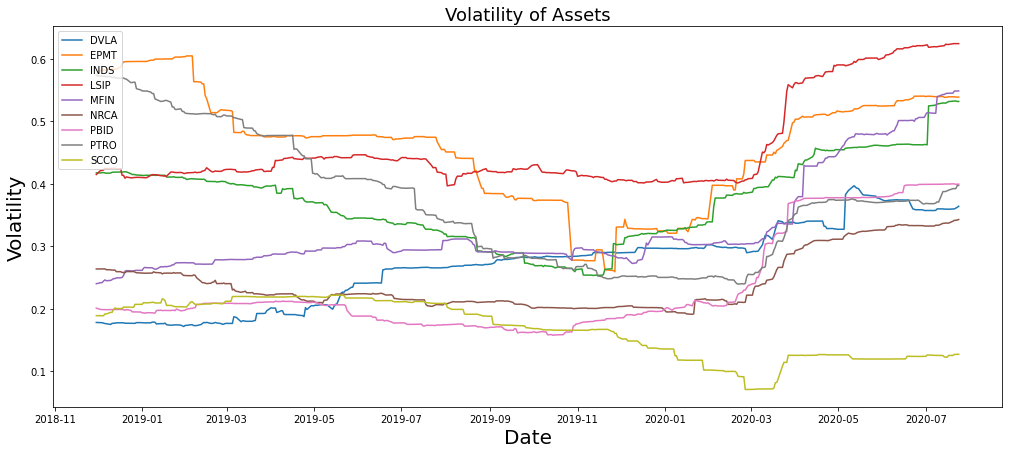

In [29]:
# plotting the volatility of our stocks
volatility = stock_prices_cluster2.pct_change().rolling(window=252).std()*(252**0.5)

plt.figure(figsize=(17,7))
plt.plot(volatility)
plt.ylabel('Volatility', size=20)
plt.xlabel('Date', size=20)
plt.title('Volatility of Assets', size=18)
plt.legend(stock_prices_cluster2.columns, loc='upper left')
plt.show()

In [30]:
#Calculating the percentage change with the previous day price for each asset. This gives us the return for the asset for different time periods

stock_returns_cluster2 = stock_prices_downsampled_cluster2.pct_change().dropna(how='all')
stock_returns_cluster2.head()

level_0,DVLA,EPMT,INDS,LSIP,MFIN,NRCA,PBID,PTRO,SCCO
Date,,,,,,,,,
2017-12-24,-0.002551,0.0,-0.011858,-0.019685,0.003484,-0.010526,0.017647,-0.094708,-0.002825
2017-12-31,0.002558,0.0,0.008000,0.140562,0.013889,0.010638,0.011561,0.021538,0.019830
2018-01-07,0.010204,0.0,0.107143,-0.045775,-0.030822,0.021053,0.085714,0.147590,0.022222
2018-01-14,-0.010101,0.0,0.003584,0.025830,0.010601,0.072165,-0.042105,0.123360,0.010870
2018-01-21,0.015306,0.0,0.017857,-0.028777,0.006993,-0.024038,0.027473,0.000000,0.021505


## Computing the Covariance of the Return, W.

<Figure size 504x504 with 0 Axes>

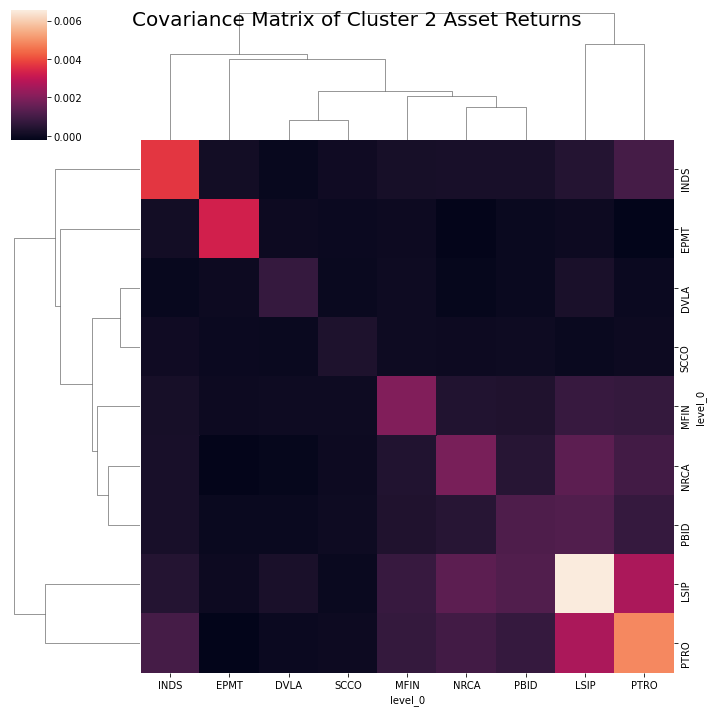

In [31]:
W = stock_returns_cluster2.cov()
plt.figure(figsize=(7, 7))
g = sns.clustermap(W)
g.fig.suptitle('Covariance Matrix of Cluster 2 Asset Returns', fontsize = 20)
plt.show()

## Identifying the hierarchical clusters among the N strategies

In [32]:
correlation_cluster2 = stock_returns_cluster2.corr()
distances_cluster2 = np.sqrt((1 - correlation_cluster2) / 2)
clusters2 = linkage(squareform(distances_cluster2), method="single")
clusters2

array([[ 3.        ,  7.        ,  0.51456663,  2.        ],
       [ 6.        ,  9.        ,  0.52801572,  3.        ],
       [ 5.        , 10.        ,  0.54473137,  4.        ],
       [ 4.        , 11.        ,  0.61414167,  5.        ],
       [ 2.        , 12.        ,  0.61443953,  6.        ],
       [ 0.        , 13.        ,  0.66174122,  7.        ],
       [ 8.        , 14.        ,  0.67449662,  8.        ],
       [ 1.        , 15.        ,  0.69291693,  9.        ]])

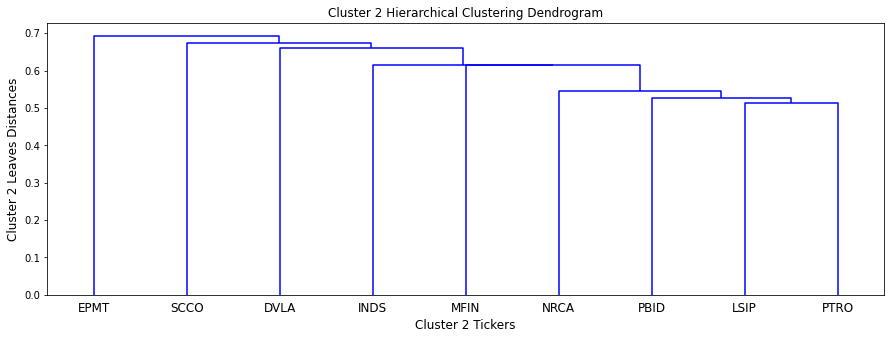

In [33]:
columns = stock_returns_cluster2.columns
plt.figure(figsize=(15, 5))
dendrogram(clusters2, labels=columns)
plt.xlabel('Cluster 2 Tickers', fontsize=12)
plt.ylabel('Cluster 2 Leaves Distances', fontsize=12)
plt.title('Cluster 2 Hierarchical Clustering Dendrogram', fontsize=12)
plt.show()

## Computing the HRP allocations

In [34]:
hrp_cluster2 = HierarchicalRiskParity()
hrp_cluster2.allocate(asset_prices=stock_prices_cluster2)
hrp_weights_cluster2 = hrp_cluster2.weights.sort_values(by=0, ascending=False, axis=1)
hrp_weights_cluster2.T

,0
level_0,
SCCO,0.423056
PBID,0.116183
DVLA,0.110079
NRCA,0.100879
MFIN,0.078077
INDS,0.066455
EPMT,0.047724
PTRO,0.032149
LSIP,0.025398


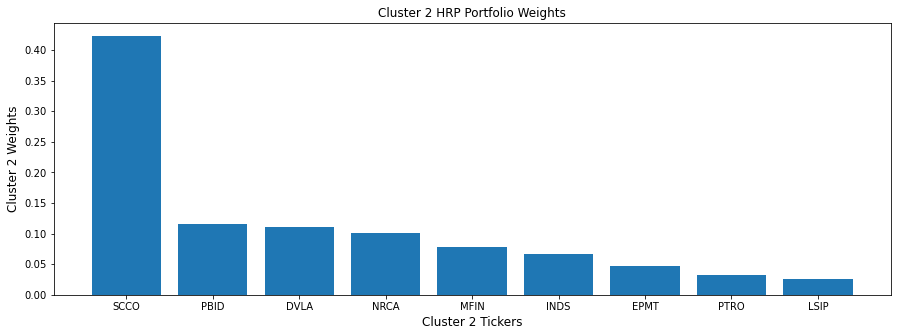

In [35]:
plt.figure(figsize=(15, 5))
plt.bar(hrp_weights_cluster2.columns, hrp_weights_cluster2.values[0])
plt.xlabel('Cluster 2 Tickers', fontsize=12)
plt.ylabel('Cluster 2 Weights', fontsize=12)
plt.title('Cluster 2 HRP Portfolio Weights', fontsize=12)
plt.show()

## Computing the minimum variance (min volatility) solution using Critical Line Algorithm

In [36]:
cla_cluster2 = CriticalLineAlgorithm()
cla_cluster2.allocate(asset_prices=stock_prices_cluster2, resample_by='W', solution='min_volatility')
cla_weights_cluster2 = cla_cluster2.weights.sort_values(by=0, ascending=False, axis=1)
cla_weights_cluster2.T

,0
level_0,
SCCO,0.494607
DVLA,0.246695
PBID,0.078081
NRCA,0.069840
EPMT,0.051569
MFIN,0.034801
INDS,0.024406
LSIP,0.000000
PTRO,0.000000


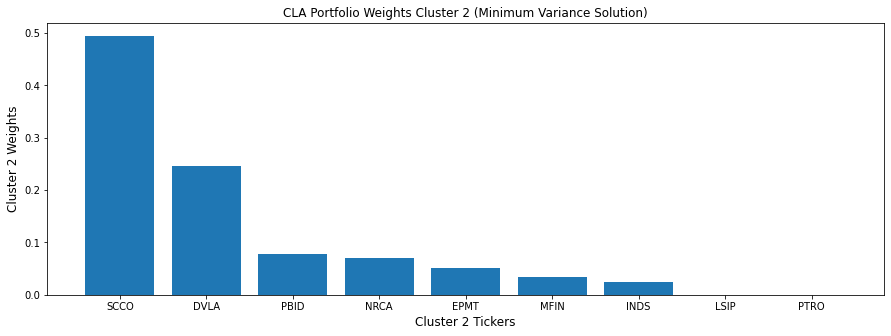

In [37]:
plt.figure(figsize=(15, 5))
plt.bar(cla_weights_cluster2.columns, cla_weights_cluster2.values[0])
plt.xlabel('Cluster 2 Tickers', fontsize=12)
plt.ylabel('Cluster 2 Weights', fontsize=12)
plt.title('CLA Portfolio Weights Cluster 2 (Minimum Variance Solution)', fontsize=12)
plt.show()

## Computing Inverse Variance Portfolio Allocations

In [38]:
mvo = MeanVarianceOptimisation()
mvo.allocate(asset_prices=stock_prices_cluster2, solution='inverse_variance')
ivp_weights_cluster2 = mvo.weights.sort_values(by=0, ascending=False, axis=1)
ivp_weights_cluster2.T

,0
level_0,
SCCO,0.357335
NRCA,0.129647
PBID,0.129122
DVLA,0.122338
MFIN,0.067753
INDS,0.056131
PTRO,0.053776
LSIP,0.042484
EPMT,0.041413


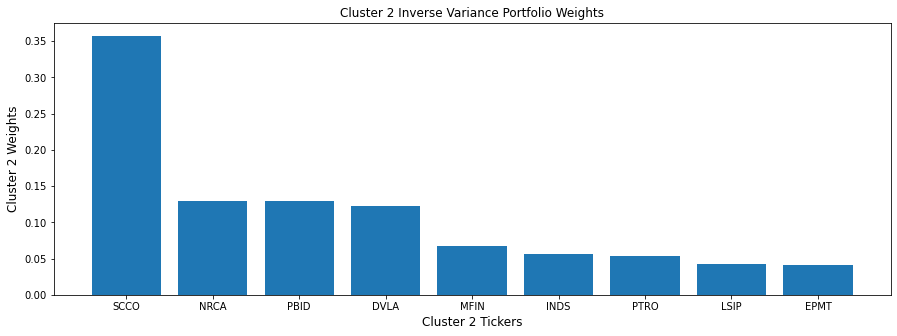

In [39]:
plt.figure(figsize=(15, 5))
plt.bar(ivp_weights_cluster2.columns, ivp_weights_cluster2.values[0])
plt.xlabel('Cluster 2 Tickers', fontsize=12)
plt.ylabel('Cluster 2 Weights', fontsize=12)
plt.title('Cluster 2 Inverse Variance Portfolio Weights', fontsize=12)
plt.show()

## Computing Asset Returns

In [40]:
ret_est_cluster2 = ReturnsEstimators()
stocks_returns_cluster2 = ret_est_cluster2.calculate_returns(stock_prices_cluster2)
stocks_returns_cluster2.iloc[:,0:10].head()

level_0,DVLA,EPMT,INDS,LSIP,MFIN,NRCA,PBID,PTRO,SCCO
Date,,,,,,,,,
2017-12-14,0.010256,0.000000,0.004016,0.012146,0.010526,0.005291,-0.028409,-0.030387,0.000000
2017-12-15,-0.005076,-0.003333,0.012000,0.016000,-0.003472,0.000000,-0.005848,0.022792,-0.005618
2017-12-18,-0.015306,0.000000,0.011858,0.023622,0.003484,-0.005263,-0.005882,-0.019499,0.005650
2017-12-19,0.015544,0.000000,-0.015625,0.000000,0.000000,-0.005291,0.011834,0.000000,-0.005618
2017-12-20,0.010204,0.000000,-0.019841,-0.026923,-0.024306,-0.026596,0.005848,-0.034091,-0.002825


## Calculate Cluster 2 Sharpe Ratio

In [41]:
sr_cluster_2 = sharpe_ratio(stocks_returns_cluster2)
sr_cluster_2

level_0
DVLA    0.501480
EPMT   -0.032979
INDS    0.814800
LSIP    0.124134
MFIN    0.588386
NRCA    0.317660
PBID    0.406889
PTRO    0.404900
SCCO    0.563921
dtype: float64

## Cluster 2 Expected Annualized Returns

In [42]:
assets_annual_returns_cluster2 = ret_est_cluster2.calculate_mean_historical_returns(stock_prices_cluster2, frequency=252)
assets_annual_returns_cluster2.sort_values(ascending=False)

level_0
INDS    0.353463
MFIN    0.232323
PTRO    0.179451
DVLA    0.147356
PBID    0.116378
SCCO    0.096956
NRCA    0.090673
LSIP    0.061897
EPMT   -0.016656
dtype: float64

In [43]:
print('Cluster 2 portfolio selection give expected annual return: ', assets_annual_returns_cluster2.mean()*100, 'percent')

Cluster 2 portfolio selection give expected annual return:  14.020453281164516 percent


In [44]:
assets_exp_annual_returns_cluster2 = ret_est_cluster2.calculate_exponential_historical_returns(stock_prices_cluster2, frequency=252, span=200)
assets_exp_annual_returns_cluster2.sort_values(ascending=False)

level_0
PTRO    0.952261
INDS    0.490385
LSIP    0.344260
SCCO    0.265480
DVLA    0.237250
PBID    0.161717
EPMT    0.097834
NRCA    0.085021
MFIN   -0.051989
Name: 2020-07-24 00:00:00, dtype: float64

In [45]:
print('Cluster 2 portfolio give expected annual return exponentially: ', assets_exp_annual_returns_cluster2.mean()*100, 'percent')

Cluster 2 portfolio give expected annual return exponentially:  28.691331521301745 percent


<hr>

## __Cluster 3 Profiling__

In [46]:
cluster3 = df_data.iloc[[4, 15, 20, 21, 23, 29, 34, 40, 51]]
cluster3 = cluster3.drop(['Unnamed: 0'], axis=1)
cluster3

,Company_Name,Code_Name,Subsector,Equity,PBVR,DER,Div_Yield,ROE,DPR
4,Waskita Beton Precast Tbk.,WSBP,Cement,7210.00,0.74,1.1848,0.0407,0.0579,0.5138
15,Bank Negara Indonesia (Persero,BBNI,Bank,107480.00,0.81,7.0584,0.0442,0.1582,0.2261
20,Cikarang Listrindo Tbk.,POWR,Energy,9250.92,0.88,0.9630,0.0418,0.0196,1.9143
21,Indonesia Kendaraan Terminal T,IPCC,"Toll Road, Airport, Harbor",1090.00,0.72,0.7903,0.0811,0.0746,0.7749
23,PP Presisi Tbk.,PPRE,Non Building Construction,2240.00,0.89,1.9676,0.0332,0.0250,1.3000
29,Mitrabara Adiperdana Tbk.,MBAP,Coal Mining,2245.60,0.79,0.3792,0.0955,0.3717,0.2025
34,Elnusa Tbk.,ELSA,Crude Petroleum & Natural Gas,3630.00,0.49,1.1532,0.0505,0.0571,0.4361
40,Indo-Rama Synthetics Tbk.,INDR,"Textile, Garment",5260.50,0.24,1.0903,0.1504,0.0460,0.7852
51,MNC Studios International Tbk.,MSIN,"Advertising, Printing And Medi",1430.00,0.92,0.6068,0.0833,0.1669,0.4565


In [47]:
#import historical stock prices data from 2015 - 2020

WSBP = pd.read_csv('WSBP.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
BBNI = pd.read_csv('BBNI.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
POWR = pd.read_csv('POWR.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
IPCC = pd.read_csv('IPCC.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
PPRE = pd.read_csv('PPRE.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
MBAP = pd.read_csv('MBAP.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
ELSA = pd.read_csv('ELSA.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
INDR = pd.read_csv('INDR.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
MSIN = pd.read_csv('MSIN.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)

p = [WSBP, BBNI, POWR, IPCC, PPRE, MBAP, ELSA, INDR, MSIN]
stock_prices_cluster3 = pd.concat(p,keys= ['WSBP', 'BBNI', 'POWR', 'IPCC', 'PPRE', 'MBAP', 'ELSA', 'INDR', 'MSIN'],axis=0).reset_index()
stock_prices_cluster3 = stock_prices_cluster3.drop(['Open', 'High', 'Low', 'Close','Volume'], axis=1)
stock_prices_cluster3['Date'] = pd.to_datetime(stock_prices_cluster3['Date'])
stock_prices_cluster3 = stock_prices_cluster3.set_index('Date', drop=True)
stock_prices_cluster3 = stock_prices_cluster3.sort_index()
stock_prices_cluster3 = stock_prices_cluster3.pivot_table('Adj Close', ['Date'], 'level_0')
stock_prices_cluster3 = stock_prices_cluster3.dropna(axis=0)
# stock_prices = stock_prices.resample('D').sum()


stock_prices_cluster3.tail(10)

level_0,BBNI,ELSA,INDR,IPCC,MBAP,MSIN,POWR,PPRE,WSBP
Date,,,,,,,,,
2020-07-13,4750.0,231.789001,2270.0,422.0,1705.0,252.0,590.0,197.0,204.0
2020-07-14,4720.0,231.789001,2260.0,430.0,1690.0,252.0,590.0,195.0,202.0
2020-07-15,4710.0,231.789001,2270.0,428.0,1755.0,258.0,580.0,200.0,204.0
2020-07-16,4700.0,231.789001,2250.0,438.0,1890.0,254.0,590.0,200.0,208.0
2020-07-17,4670.0,234.000000,2260.0,438.0,1805.0,256.0,600.0,204.0,208.0
2020-07-20,4540.0,226.000000,2250.0,436.0,1840.0,256.0,600.0,202.0,202.0
2020-07-21,4680.0,238.000000,2300.0,430.0,1760.0,260.0,600.0,195.0,202.0
2020-07-22,4670.0,238.000000,2260.0,434.0,1750.0,272.0,600.0,195.0,202.0
2020-07-23,4710.0,238.000000,2300.0,442.0,1740.0,272.0,600.0,196.0,204.0


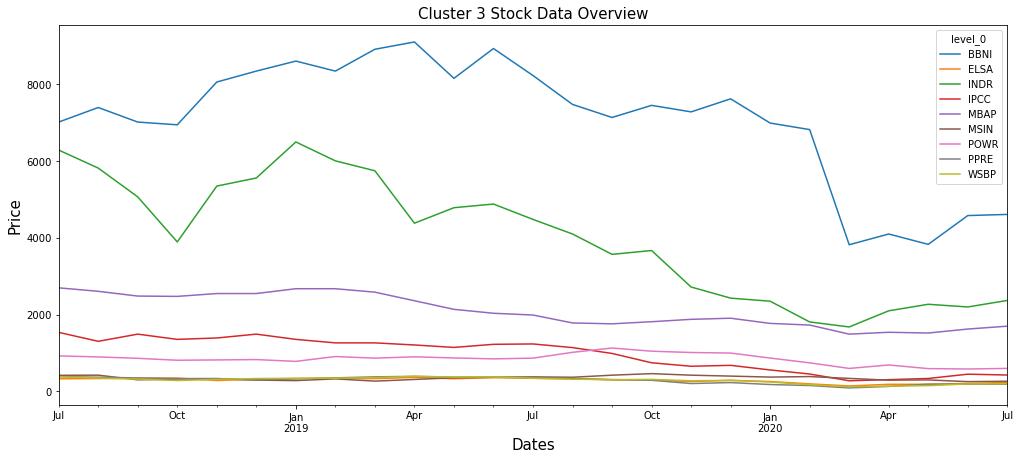

In [48]:
# Taking a quick look at the data
stock_prices_cluster3.resample('M').last().plot(figsize=(17,7))
plt.ylabel('Price', size=15)
plt.xlabel('Dates', size=15)
plt.title('Cluster 3 Stock Data Overview', size=15)
plt.show()

In [49]:
stock_prices_downsampled_cluster3 = stock_prices_cluster3.resample('W').last()
stock_prices_downsampled_cluster3.head()

level_0,BBNI,ELSA,INDR,IPCC,MBAP,MSIN,POWR,PPRE,WSBP
Date,,,,,,,,,
2018-07-15,6872.443359,311.816345,6074.727051,1497.197266,2797.386475,478.354279,1044.489624,384.358185,338.761292
2018-07-22,6872.443359,315.528473,5629.090820,1497.197266,2690.112061,454.673370,949.123169,384.358185,344.138458
2018-07-29,7062.027832,339.657104,6332.727051,1529.052490,2929.416260,439.517578,940.040710,386.242279,362.062317
2018-08-05,7488.593262,361.929718,6356.181641,1510.849609,2723.119385,473.618103,908.251892,384.358185,367.439484
2018-08-12,7559.687500,354.505493,6285.818359,1492.646606,2673.608154,428.150757,894.628113,374.937653,372.816681


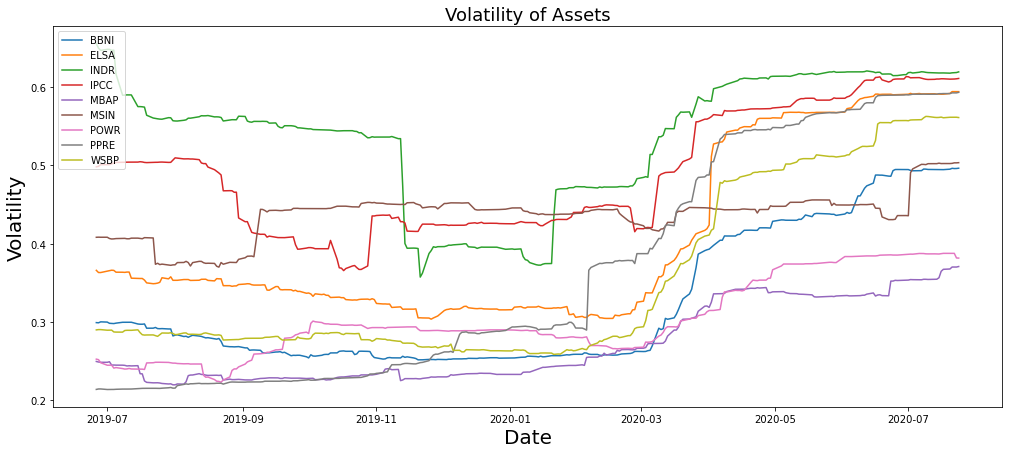

In [50]:
# plotting the volatility of our stocks
volatility = stock_prices_cluster3.pct_change().rolling(window=252).std()*(252**0.5)

plt.figure(figsize=(17,7))
plt.plot(volatility)
plt.ylabel('Volatility', size=20)
plt.xlabel('Date', size=20)
plt.title('Volatility of Assets', size=18)
plt.legend(stock_prices_cluster3.columns, loc='upper left')
plt.show()

In [51]:
#Calculating the percentage change with the previous day price for each asset. This gives us the return for the asset for different time periods

stock_returns_cluster3 = stock_prices_downsampled_cluster3.pct_change().dropna(how='all')
stock_returns_cluster3.head()

level_0,BBNI,ELSA,INDR,IPCC,MBAP,MSIN,POWR,PPRE,WSBP
Date,,,,,,,,,
2018-07-22,0.000000,0.011905,-0.073359,0.000000,-0.038348,-0.049505,-0.091304,0.000000,0.015873
2018-07-29,0.027586,0.076471,0.125000,0.021277,0.088957,-0.033333,-0.009569,0.004902,0.052083
2018-08-05,0.060403,0.065574,0.003704,-0.011905,-0.070423,0.077586,-0.033816,-0.004878,0.014851
2018-08-12,0.009494,-0.020513,-0.011070,-0.012048,-0.018182,-0.096000,-0.015000,-0.024510,0.014634
2018-08-19,-0.112853,-0.094241,-0.089552,-0.073171,-0.043210,-0.035398,-0.015228,-0.035176,-0.081731


## Computing the Covariance of the Return, Z

<Figure size 504x504 with 0 Axes>

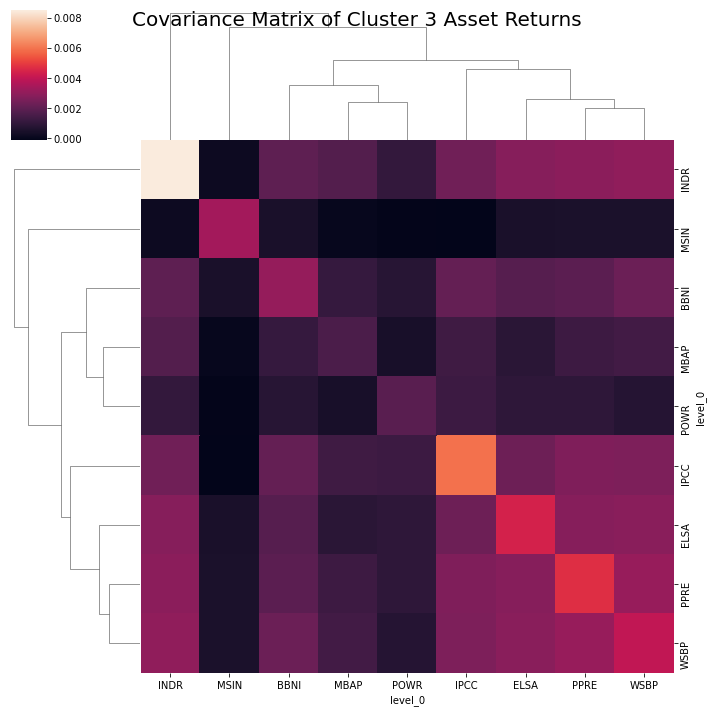

In [52]:
Z = stock_returns_cluster3.cov()
plt.figure(figsize=(7, 7))
j = sns.clustermap(Z)
j.fig.suptitle('Covariance Matrix of Cluster 3 Asset Returns', fontsize = 20)
plt.show()

## Identifying the hierarchical clusters among the N strategies

In [53]:
correlation_cluster3 = stock_returns_cluster3.corr()
distances_cluster3 = np.sqrt((1 - correlation_cluster3) / 2)
clusters3 = linkage(squareform(distances_cluster3), method="single")
clusters3

array([[ 7.        ,  8.        ,  0.36890145,  2.        ],
       [ 1.        ,  9.        ,  0.39721477,  3.        ],
       [ 0.        , 10.        ,  0.42289485,  4.        ],
       [ 4.        , 11.        ,  0.47253484,  5.        ],
       [ 3.        , 12.        ,  0.47830716,  6.        ],
       [ 2.        , 13.        ,  0.49311674,  7.        ],
       [ 6.        , 14.        ,  0.55883228,  8.        ],
       [ 5.        , 15.        ,  0.65371548,  9.        ]])

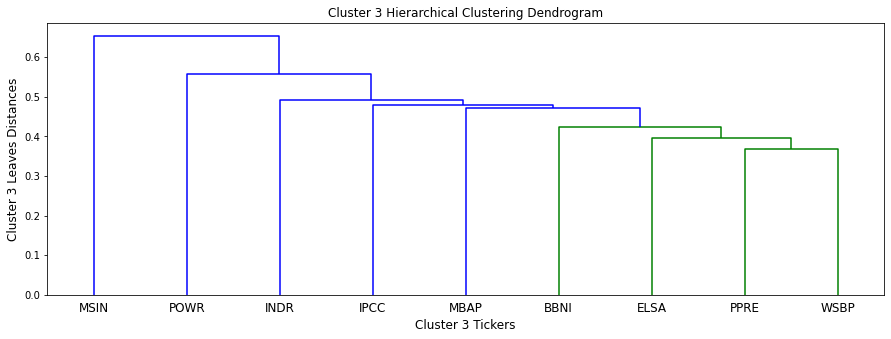

In [54]:
columns = stock_returns_cluster3.columns
plt.figure(figsize=(15, 5))
dendrogram(clusters3, labels=columns)
plt.xlabel('Cluster 3 Tickers', fontsize=12)
plt.ylabel('Cluster 3 Leaves Distances', fontsize=12)
plt.title('Cluster 3 Hierarchical Clustering Dendrogram', fontsize=12)
plt.show()

## Computing the HRP allocations

In [55]:
hrp_cluster3 = HierarchicalRiskParity()
hrp_cluster3.allocate(asset_prices=stock_prices_cluster3)
hrp_weights_cluster3 = hrp_cluster3.weights.sort_values(by=0, ascending=False, axis=1)
hrp_weights_cluster3.T

,0
level_0,
MBAP,0.266917
POWR,0.244083
MSIN,0.126318
BBNI,0.083889
ELSA,0.070110
INDR,0.063935
IPCC,0.054571
PPRE,0.045295
WSBP,0.044880


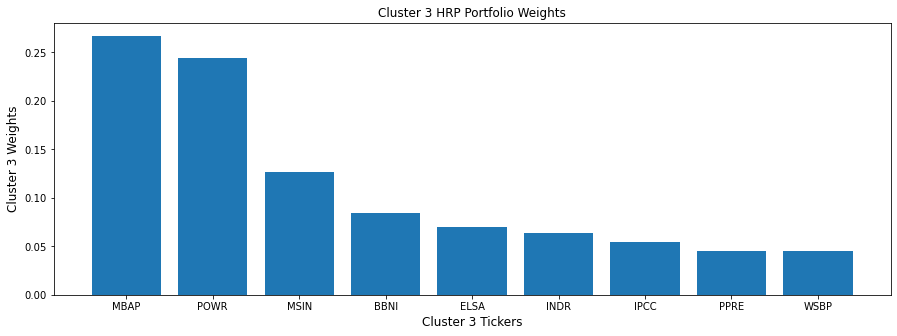

In [56]:
plt.figure(figsize=(15, 5))
plt.bar(hrp_weights_cluster3.columns, hrp_weights_cluster3.values[0])
plt.xlabel('Cluster 3 Tickers', fontsize=12)
plt.ylabel('Cluster 3 Weights', fontsize=12)
plt.title('Cluster 3 HRP Portfolio Weights', fontsize=12)
plt.show()

## Computing the minimum variance (min volatility) solution using Critical Line Algorithm

In [57]:
cla_cluster3 = CriticalLineAlgorithm()
cla_cluster3.allocate(asset_prices=stock_prices_cluster3, resample_by='W', solution='min_volatility')
cla_weights_cluster3 = cla_cluster3.weights.sort_values(by=0, ascending=False, axis=1)
cla_weights_cluster3.T

,0
level_0,
MBAP,0.406900
POWR,0.345706
MSIN,0.242862
ELSA,0.004532
BBNI,0.000000
INDR,0.000000
IPCC,0.000000
PPRE,0.000000
WSBP,0.000000


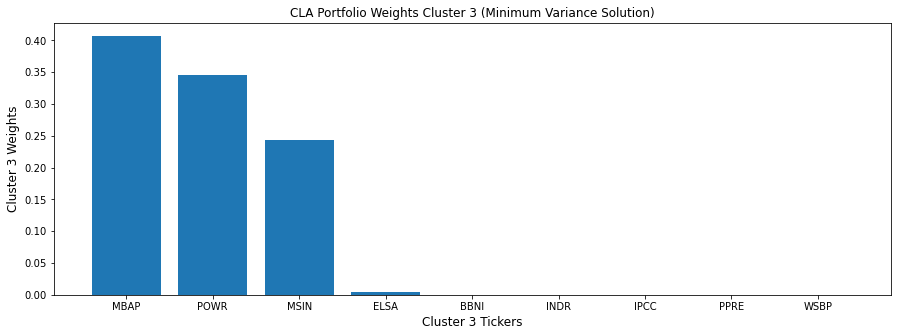

In [58]:
plt.figure(figsize=(15, 5))
plt.bar(cla_weights_cluster3.columns, cla_weights_cluster3.values[0])
plt.xlabel('Cluster 3 Tickers', fontsize=12)
plt.ylabel('Cluster 3 Weights', fontsize=12)
plt.title('CLA Portfolio Weights Cluster 3 (Minimum Variance Solution)', fontsize=12)
plt.show()

## Computing Inverse Variance Portfolio Allocations

In [59]:
mvo = MeanVarianceOptimisation()
mvo.allocate(asset_prices=stock_prices_cluster3, solution='inverse_variance')
ivp_weights_cluster3 = mvo.weights.sort_values(by=0, ascending=False, axis=1)
ivp_weights_cluster3.T

,0
level_0,
MBAP,0.201203
POWR,0.188090
BBNI,0.118655
PPRE,0.101145
WSBP,0.100217
MSIN,0.095219
ELSA,0.082212
IPCC,0.063991
INDR,0.049268


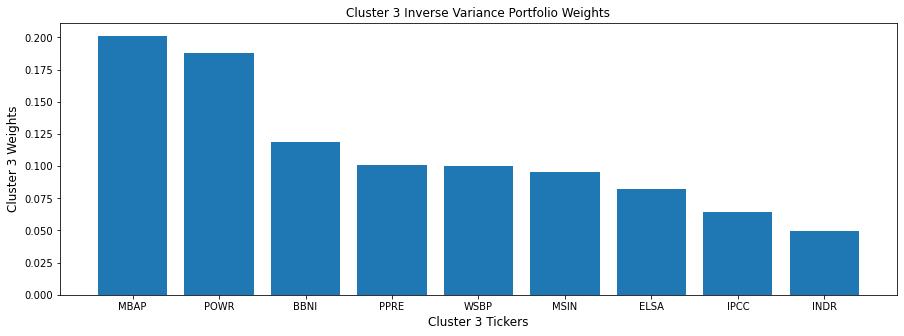

In [60]:
plt.figure(figsize=(15, 5))
plt.bar(ivp_weights_cluster3.columns, ivp_weights_cluster3.values[0])
plt.xlabel('Cluster 3 Tickers', fontsize=12)
plt.ylabel('Cluster 3 Weights', fontsize=12)
plt.title('Cluster 3 Inverse Variance Portfolio Weights', fontsize=12)
plt.show()

## Computing Asset Returns

In [61]:
ret_est_cluster3 = ReturnsEstimators()
stocks_returns_cluster3 = ret_est_cluster3.calculate_returns(stock_prices_cluster3)
stocks_returns_cluster3.iloc[:,0:10].head()

level_0,BBNI,ELSA,INDR,IPCC,MBAP,MSIN,POWR,PPRE,WSBP
Date,,,,,,,,,
2018-07-10,0.013889,-0.045455,0.087719,-0.037901,0.017964,-0.012346,0.017699,0.000000,0.000000
2018-07-11,-0.017123,-0.005952,0.060484,0.000000,-0.014706,0.008333,0.043478,-0.010000,-0.005376
2018-07-12,-0.020906,0.005988,-0.019011,0.000000,0.008955,0.004132,-0.041667,0.020202,0.021622
2018-07-13,0.032028,0.000000,0.003876,-0.003030,0.002959,0.039095,0.000000,0.009901,0.000000
2018-07-16,0.013793,-0.023810,-0.042471,-0.009118,-0.047198,-0.029703,0.000000,0.000000,0.000000


## Calculate Cluster 3 Sharpe Ratio

In [62]:
sr_cluster_3 = sharpe_ratio(stocks_returns_cluster3)
sr_cluster_3

level_0
BBNI   -0.265859
ELSA   -0.094814
INDR   -0.316332
IPCC   -0.851275
MBAP   -0.594893
MSIN   -0.367916
POWR   -0.645812
PPRE   -0.539280
WSBP   -0.333052
dtype: float64

## Cluster 3 Expected Annualized Returns

In [63]:
assets_annual_returns_cluster3 = ret_est_cluster3.calculate_mean_historical_returns(stock_prices_cluster3, frequency=252)
assets_annual_returns_cluster3.sort_values(ascending=False)

level_0
ELSA   -0.046146
BBNI   -0.107705
WSBP   -0.146814
MSIN   -0.166384
MBAP   -0.185075
INDR   -0.198878
POWR   -0.207802
PPRE   -0.236629
IPCC   -0.469610
dtype: float64

In [64]:
print('Cluster 3 portfolio selection give expected annual return: ', assets_annual_returns_cluster3.mean()*100, 'percent')

Cluster 3 portfolio selection give expected annual return:  -19.61157874916692 percent


In [65]:
assets_exp_annual_returns_cluster3 = ret_est_cluster3.calculate_exponential_historical_returns(stock_prices_cluster3, frequency=252, span=200)
assets_exp_annual_returns_cluster3.sort_values(ascending=False)

level_0
ELSA    0.220539
PPRE    0.135310
WSBP    0.118345
INDR    0.072188
MBAP    0.047589
IPCC   -0.172361
BBNI   -0.213130
POWR   -0.403750
MSIN   -0.448938
Name: 2020-07-24 00:00:00, dtype: float64

In [66]:
print('Cluster 3 portfolio give expected annual return exponentially: ', assets_exp_annual_returns_cluster3.mean()*100, 'percent')

Cluster 3 portfolio give expected annual return exponentially:  -7.15787319934556 percent


<hr>

We observe a clear difference in the allocation strategies of the 3 algorithms:

* CLA concentrates literally 99% of the holdings on the top-3 investments and assigns zero weight to all other assets. The reason behind CLA's extreme concentration is its goal of minimising the variance of the portfolio. This makes it very conservative in allocating weights and it places emphasis on only a few of the assets.

* Inverse variance (IVP) has assigned non-zero weights to all the assets and except the top 5 holdings, its weight allocations are distributed almost uniformly.

* HRP, on the other hand, tries to find a middle ground between CLA and IVP allocations. It places more emphasis on the top 5 holdings/assets just like IVP but assigns lesser values to the rest of the weights but not a uniform allocation.

* Another important fact is that both the CLA and HRP weights have very little difference in their standard deviations, $\sigma^{2}_{HRP} = 0.12$ and $\sigma^{2}_{CLA} = 0.15$. However, CLA has discarded half of the investment universe in favor of a minor risk reduction while HRP did not. Since, CLA has placed its emphasis on only a few of the assets, it is prone to much more negative impact by random shocks than HRP - something which we will see in the next set of questions.

<hr>